In [2]:
import torch

In [3]:
#Define simple Tensor

In [20]:
x = torch.Tensor(
    [[1,2,3,4],
    [5,6,7,8],
    [1,2,3,4]
    [5,6,7,8]]
)

In [8]:
x.shape

torch.Size([2, 4])

In [12]:
#Get specialized element [1,3]
x[1,3]

tensor(8.)

In [17]:
#Get a slice of column, all items of 0 column
x[:, 0] 

tensor([1., 5.])

In [18]:
#Get a slice of row, change the indexes of slice
x[1, :]

tensor([5., 6., 7., 8.])

In [22]:
#In general: 
#x[{row}:{row}, {column}:{column}]

#Get 2 first items from 3rd column
x[0:2, 2]

tensor([3., 7.])

In [28]:
#Check whether we have avaliable GPU on our machine
torch.cuda.is_available()

False

In [31]:
#Check whether we have avaliable GPU on our machine //Uninstalled
torch.cuda.get_device_name()

AssertionError: Torch not compiled with CUDA enabled

In [3]:
#Gradient Descent
import torch

In [12]:
x = torch.tensor([
    [1.,2.,3.,4.,5.],
    [6.,7.,8.,9.,10.]
],requires_grad=True)

function = 10 * (x ** 2).sum()
print(x)
print(function)


function.backward() 
print(x)
print(x.grad)

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.]], requires_grad=True)
tensor(3850., grad_fn=<MulBackward0>)
tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.]], requires_grad=True)
tensor([[ 20.,  40.,  60.,  80., 100.],
        [120., 140., 160., 180., 200.]])


In [13]:
# Реализуйте расчет градиента для функции f(w) = \prod\limits_{i,j}{log_{e}(log_{e}({w_{i,j} + 7}}))f(w)= 
# i,j∏loge(loge(wi,j+7)) в точке w = [[5, 10], [1, 2]]w =[[5,10],[1,2]]

In [14]:
import torch
import sympy

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)

function =  (torch.log(torch.log(w + 7))).prod()
function.backward()

print(w.grad)

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])


In [19]:
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

for _ in range(500):
    # it's critical to calculate function inside the loop:
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -= alpha * w.grad
    w.grad.zero_()

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


In [30]:
#wrap it
x = torch.tensor([
    [8., 8.]
], requires_grad=True)

def loss_(vector):
    return 10 * (vector ** 2).sum()

def gradient(loss_function, vector):
    loss_result = loss_function(vector)
    loss_result.backward()
    vector.data -= 0.001 * vector.grad
    vector.grad.zero_()
    print(vector.data)

for i in range(5):
    gradient(loss_, x)

tensor([[7.8400, 7.8400]])
tensor([[7.6832, 7.6832]])
tensor([[7.5295, 7.5295]])
tensor([[7.3789, 7.3789]])
tensor([[7.2314, 7.2314]])


In [36]:
#add option for optimizers
x = torch.tensor([
    [8., 8.]
], requires_grad=True)

optimizer = torch.optim.SGD([x], lr=0.001)

def loss_(vector):
    return 10 * (vector ** 2).sum()

def gradient(loss_function, vector):
    loss_result = loss_function(vector)
    loss_result.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(vector.data)

for i in range(5):
    gradient(loss_, x)

tensor([[7.8400, 7.8400]])
tensor([[7.6832, 7.6832]])
tensor([[7.5295, 7.5295]])
tensor([[7.3789, 7.3789]])
tensor([[7.2314, 7.2314]])


In [38]:
#Build NeuralNet / For Regression Task

In [40]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13, 5)

In [56]:
#data
X_train = torch.rand(100) * 20 - 10
y_train = torch.sin(X_train)

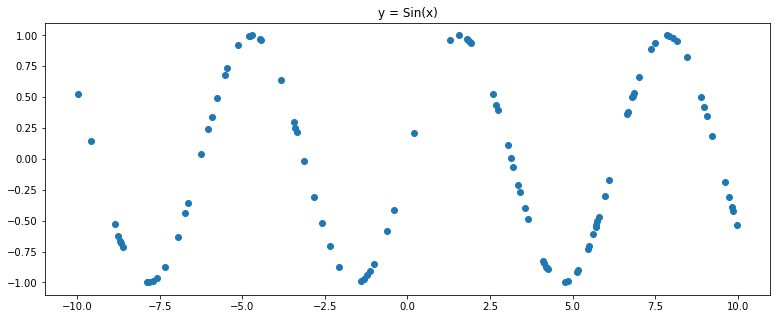

In [58]:
plt.plot(X_train.numpy(), y_train.numpy(), 'o');
plt.title('y = Sin(x)');

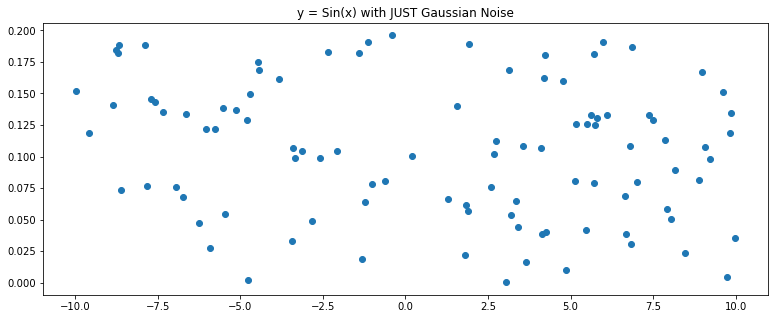

In [60]:
#add some noise

noise = torch.rand(y_train.size()) / 5
plt.plot(X_train.numpy(), noise.numpy(), 'o');
plt.title('y = Sin(x) with JUST Gaussian Noise');

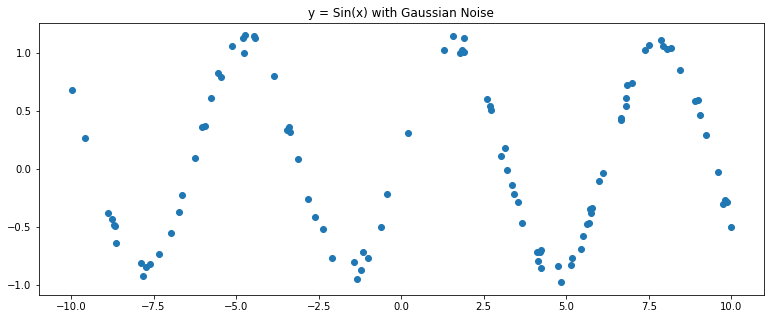

In [61]:
y_train = y_train + noise
plt.plot(X_train.numpy(), y_train.numpy(), 'o');
plt.title('y = Sin(x) with Gaussian Noise');

In [63]:
####Important point:
####INPUT DATA SHOULD BE SQUEEZED TO VECTOR, SIZE: (N, 1) <-- WHERE N NUMBER OF SCALARS
####Torch function: torch.unsqueeze(1)

X_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[ 0.8212],
        [-0.0408],
        [-0.3809],
        [ 0.5896],
        [ 1.1495],
        [-0.1061],
        [ 0.8485],
        [ 0.5990],
        [-0.5533],
        [-0.5015],
        [ 1.1286],
        [ 0.1117],
        [-0.2150],
        [-0.8004],
        [ 0.4199],
        [ 1.0236],
        [-0.5041],
        [-0.8066],
        [ 1.1129],
        [-0.8537],
        [ 1.0052],
        [ 0.7392],
        [-0.3521],
        [-0.6410],
        [-0.7144],
        [ 1.0244],
        [-0.7670],
        [-0.7190],
        [-0.3402],
        [-0.0325],
        [-0.9514],
        [ 0.5071],
        [ 0.3101],
        [ 0.2868],
        [ 0.0909],
        [ 0.8012],
        [ 0.4588],
        [-0.3830],
        [ 0.3705],
        [-0.8111],
        [-0.8242],
        [-0.2236],
        [-0.4757],
        [ 0.9961],
        [-0.9230],
        [-0.4912],
        [-0.1436],
        [ 0.3556],
        [-0.2223],
        [ 1.0559],
        [-0.4187],
        [ 0.6127],
        [ 1.

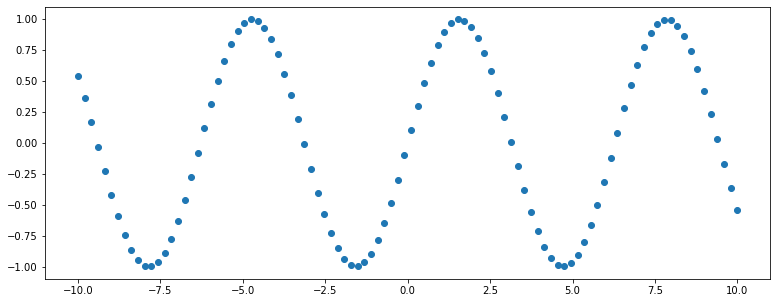

In [81]:
#Validation data
X_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(X_validation.data)

plt.plot(X_validation.numpy(), y_validation.numpy(), 'o');

In [82]:
X_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [83]:
#Model constraction

class SinNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SinNet, self).__init__()
        self.full_conn_layer_1 = torch.nn.Linear(1, n_hidden_neurons) #(input_neurons, output_neurrons)
        self.activation_function_1 = torch.nn.Sigmoid()
        self.full_conn_layer_2 = torch.nn.Linear(n_hidden_neurons, 1) #(input_neurons, output_neurrons)
        
    def forward(self, x):
        x = self.full_conn_layer_1(x)
        x = self.activation_function_1(x)
        x = self.full_conn_layer_2(x)
        return x

In [103]:
#SinNet(30).forward(X_train)

In [84]:
#Predict without fitting
def predict(net, X, y):
    y_pred = net.forward(X)
    
    plt.plot(X.numpy(), y.numpy(), 'o')
    plt.title('Groud Truth')
    
    plt.plot(X.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
    
    

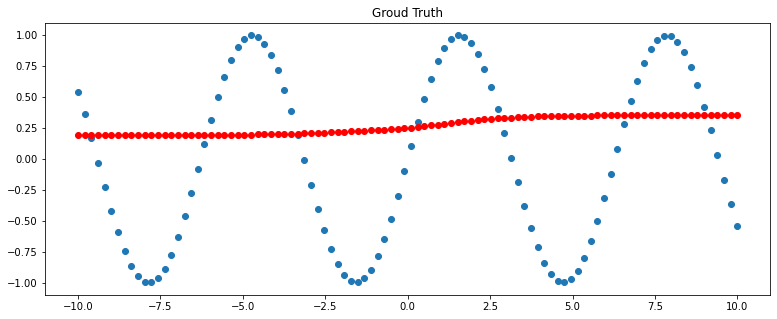

In [87]:
sin_net = SinNet(30)
predict(sin_net, X_validation, y_validation);

In [88]:
#More over
#Need to:
#  - define optimizer
#  - define loss function

In [98]:
#Optimizer
optimizer = torch.optim.Adam(sin_net.parameters(), lr=0.001)

#Loss function
def loss(pred, target):
    squares = (pred - target)**2
    return squares.mean()

In [96]:
sin_net.parameters

<bound method Module.parameters of SinNet(
  (full_conn_layer_1): Linear(in_features=1, out_features=30, bias=True)
  (activation_function_1): Sigmoid()
  (full_conn_layer_2): Linear(in_features=30, out_features=1, bias=True)
)>

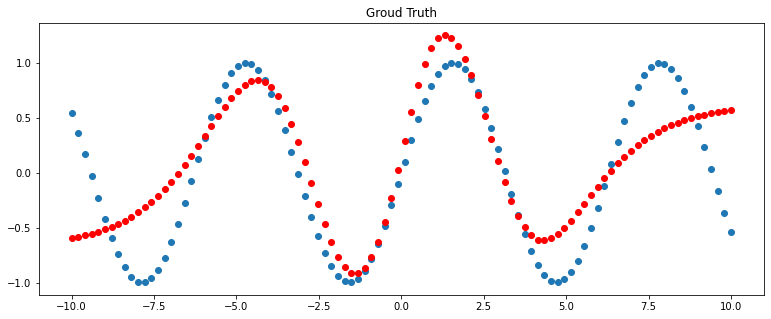

In [100]:
#Training

for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = sin_net.forward(X_train)
    loss_val = loss(y_pred, y_train)
    
    loss_val.backward()
    optimizer.step()
    
predict(sin_net, X_validation, y_validation)


In [104]:
########

In [105]:
import torch
import matplotlib

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.full_conn_layer_1 = torch.nn.Linear(1, n_hidden_neurons) 
        self.activation_function_1 = torch.nn.Tanh()
        self.full_conn_layer_2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons) 
        self.activation_function_2 = torch.nn.Tanh()
        self.full_conn_layer_3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons) 
        self.activation_function_3 = torch.nn.Tanh()
        self.full_conn_layer_4 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        x = self.full_conn_layer_1(x)
        x = self.activation_function_1(x)
        x = self.full_conn_layer_2(x)
        x = self.activation_function_2(x)
        x = self.full_conn_layer_3(x)
        x = self.activation_function_3(x)
        x = self.full_conn_layer_4(x)
        return x
    
net = RegressionNet(30)

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    modules = (pred - target).abs().sum() / 100
    return modules

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def loss(pred, target):
    squares = (pred-target)**2
    return squares.mean()

for epoch_index in range(400):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = ((y_pred-y_train)**2).mean()
    # make backward
    loss_value.backward()
    # make step
    optimizer.step()

#print(metric(net.forward(x_validation), y_validation).item())